## $$ Data \ analysis \ and \ prediction \ of \ Insurance \ Premium$$

# **Problem statement**

Insurance companies charge insurance premium based on many factors to their customers. In order for the companies to make profits, The companies must collect higher premium than the amount that costs which may become due to the insured person. To achieve this companies invest lot of time, effort and money in creating models that predict healthcare expenses. The task is to predict the insurance premium that should be collected from the customers.

dataset.csv - Customers data of Insurance Company
1. **Age** - Age column contains data of customers age.
2. **Sex** - Sex column contains the gender of customers.
3. **BMI** - BMI column contains body mass index data of customers.
4. **Children** - Children column contains how many childrens do the customers have.
5. **Smoker** - Smoker column contains data of whether customers smoke ciggerates or not.
6. **Region** - Region column contains data of which region do the customers belong to.
7. **Charges** - Charges column is our target variable and it is the insurance cost.

## ***Let's Begin !***

## **1. Know your data and understand the variables**

#### Import basic libraries

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Load the data

In [227]:
data = pd.read_csv('dataset.csv')

In [228]:
# Dataset first five rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [229]:
# Dataset last five rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [230]:
# Dataset rows and columns count
data.shape

(1338, 7)

**There are 1338 rows and 7 columns**

In [231]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**1. There are no null values in any column**

**2. There are 3 categorical columns and 4 numerical columns**

In [232]:
# Dataset basic analysis
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [233]:
# Dataset basic analysis for object datatype
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Insights
1. Customers from age min 18 and max 64 take health insurance. Average age of Customers taking health insurance is 39.
2. Customers BMI min 15.96 to 53.13. Average BMI of Customers is 30.66.
3. Customers taking health insurance have children 0 - 5. Average no. of childrens of Customers is 1.
4. Customers health insurance cost varies from min 1121.87 to max 63770.42. Average Insurance cost is around 13279.
5. Male customers are high in number with 675 taking health insurance.
6. Customers who don't smoke ciggerates are high in number around 80%.
7. Majority of the Customers belong to southeast region.

## Handling Duplicated values

In [234]:
# Check for duplicated values in dataset
data.duplicated().sum()

1

**There is one duplicated observation and we have to deal with it**

In [235]:
data.loc[(data['bmi']==30.59) & (data['charges']==1639.56310)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


**As you can see there are two observations with the same column values and we have to drop one of the observations**

In [236]:
# Dropping duplicated observation
data.drop(195,axis=0,inplace=True)

In [237]:
data.loc[(data['bmi']==30.59) & (data['charges']==1639.56310)]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [238]:
data.duplicated().sum()

0

**We have successfully handled the duplicated observation**

In [239]:
# Rechecking the no. of rows after handling duplicated row
data.shape

(1337, 7)

### **Checking unique values for categorical columns**

In [240]:
# Check Unique Values for categorical columns.
data1 = data[['region','smoker','sex']]
for cols in data1.columns.tolist():
  print('The Unique Values of', cols, 'are:', data1[cols].unique())

The Unique Values of region are: ['southwest' 'southeast' 'northwest' 'northeast']
The Unique Values of smoker are: ['yes' 'no']
The Unique Values of sex are: ['female' 'male']


### **Domain analysis**

The dataset now contains **1337 rows and 7 columns***

The dataset has 7 columns in which 3 columns are categorical and 4 columns are numerical

**Numerical columns**

1. **Age** - Age column contains data of customers age.
2. **BMI** - BMI column contains body mass index data of customers.
3. **Children** - Children column contains how many childrens do the customers have.
4. **Charges** - Charges column is our target variable and it is the insurance cost.

**Categorical columns**

1. **Sex** - Sex column contains the gender of customers.
2. **Smoker** - Smoker column contains data of whether customers smoke ciggerates or not.
3. **Region** - Region column contains data of which region do the customers belong to.

# **2. Data Visualization, Exploratory data analysis, Experimenting with charts**

1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

### 1. **Univariate analysis**

In [241]:
# Checking the distributions of numerical columns

Text(0.5, 0, 'Age')

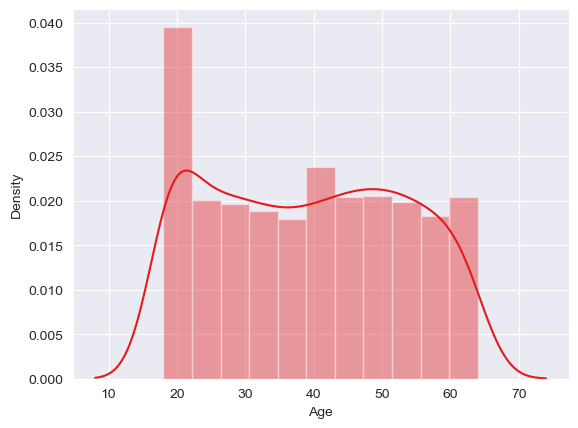

In [242]:
# Checking the distribution of age column
sns.distplot( x = data.age)
plt.xlabel('Age')

Text(0.5, 0, 'BMI')

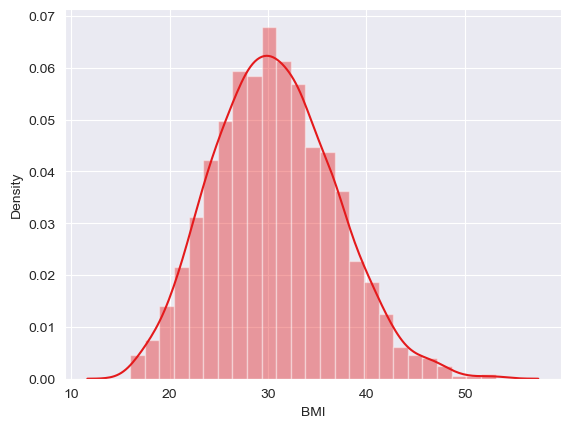

In [243]:
# checking distribution of BMI column
sns.distplot( x = data.bmi)
plt.xlabel('BMI')

Text(0.5, 0, 'Charges')

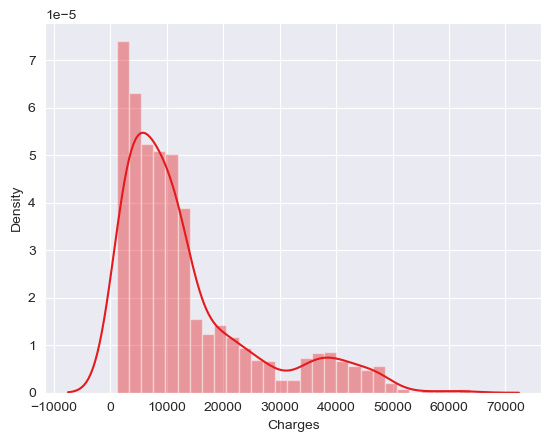

In [244]:
# checking distribution of charges column
sns.distplot( x = data.charges)
plt.xlabel('Charges')

### Insights
1. BMI column is normally distributed.
2. Age and Charges column is not normally distributed.
3. Insurance cost of 0 - 10,000 are maximum.

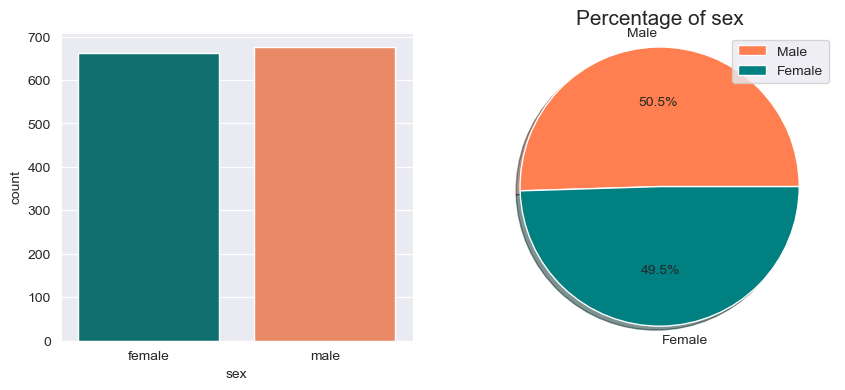

In [245]:
# Checking frequency distribution of sex column
plt.subplot(1,2,1)
colorz=['teal','coral']
sns.countplot(x=data.sex,palette=colorz)
#pie chart
plt.subplot(1,2,2)
labels = 'Male', 'Female'
sizes = data.sex.value_counts()
colors = ['coral','teal']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Percentage of sex',fontsize=15)
plt.legend( labels, loc="best")
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.plot()
plt.show()

#### Insights
* Percentage of Male and Female customers taking health insurance is almost equal, Male customers are slightly higher with just 0.5%.

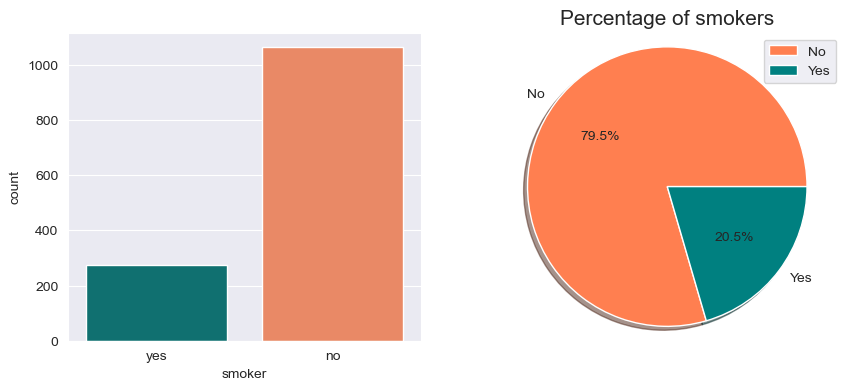

In [246]:
# Checking frequency distribution of Smoker column
plt.subplot(1,2,1)
colorz = ['teal','coral']
sns.countplot(x=data.smoker,palette=colorz)
#pie chart
plt.subplot(1,2,2)
labels = 'No', 'Yes'
sizes = data.smoker.value_counts()
colors = ['coral','teal']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Percentage of smokers',fontsize=15)
plt.legend( labels, loc="best")
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.plot()
plt.show()

### Insights
* Percentage of non smokers are higher with 79.5%.

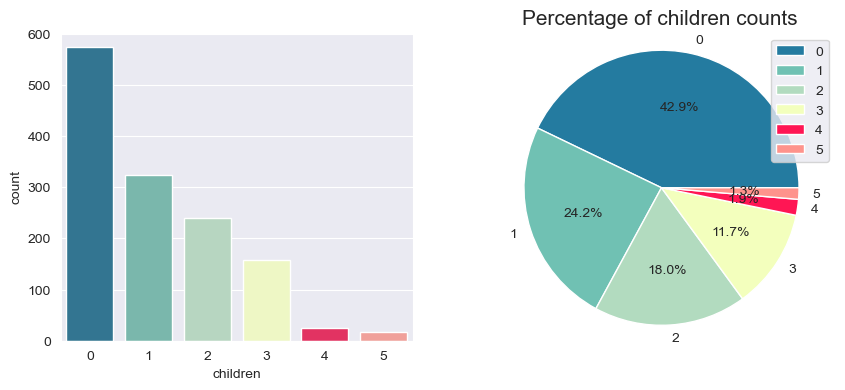

In [247]:
# Checking frequency distribution of Children column
plt.subplot(1,2,1)
personal_colors= ['#247ba0','#70c1b3','#b2dbbf','#f3ffbd','#ff1654','#fe938c']
sns.countplot(x=data.children,palette=personal_colors)
#pie chart
plt.subplot(1,2,2)
labels = 0,1,2,3,4,5
sizes = data.children.value_counts()
colors = ['#247ba0','#70c1b3','#b2dbbf','#f3ffbd','#ff1654','#fe938c']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of children counts',fontsize=15)
plt.legend( labels, loc="best")
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.plot()
plt.show()

### Insights
* Maximumn number of people have no childern with 42.9%
* People having 1 child are 24.2%, 2 childern 18.0%.
* People having more than 2 childern are only 14%.
* People with 5 children are of 1.3%

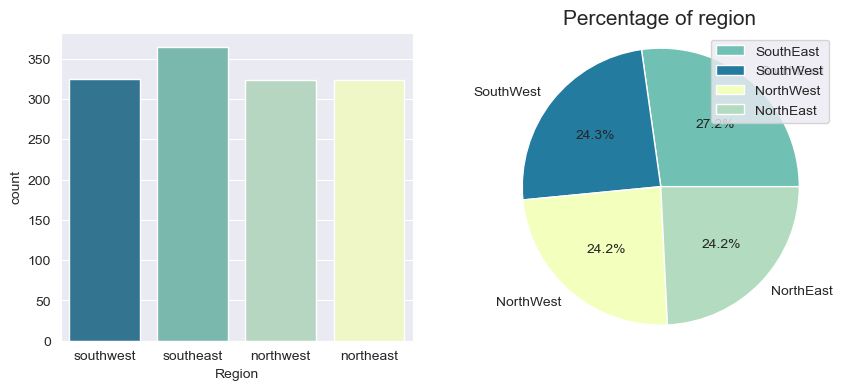

In [248]:
# Checking frequency distribution of Children column
plt.subplot(1,2,1)
personal_colors= ['#247ba0','#70c1b3','#b2dbbf','#f3ffbd']
sns.countplot(x=data.region,palette=personal_colors)
plt.xlabel('Region')
#pie chart
plt.subplot(1,2,2)
labels = ['SouthEast','SouthWest','NorthWest','NorthEast']
sizes = data.region.value_counts()
colors = ['#70c1b3','#247ba0','#f3ffbd','#b2dbbf']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of region',fontsize=15)
plt.legend( labels, loc="best")
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.plot()
plt.show()

### Insights
* People from all 4 regions contains nearly equal data.
* People from southeast region are slightly higher.

## **Bivariate analysis**

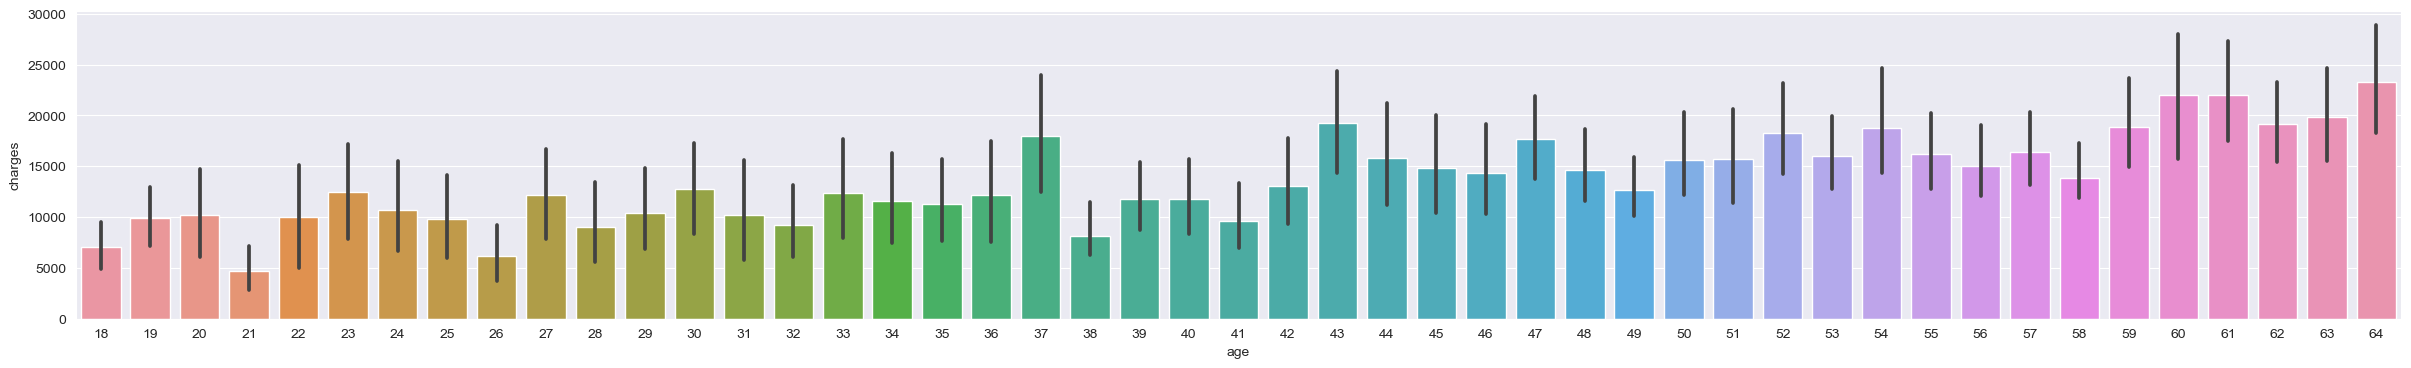

In [249]:
# Charges vs age
sns.barplot(data=data,x='age',y='charges')
fig=plt.gcf()
fig.set_size_inches(30,4)

### Insights
* As the age increases the Insurance cost also increases.
* Above 40 years age the Insurance cost goes above 20,000.

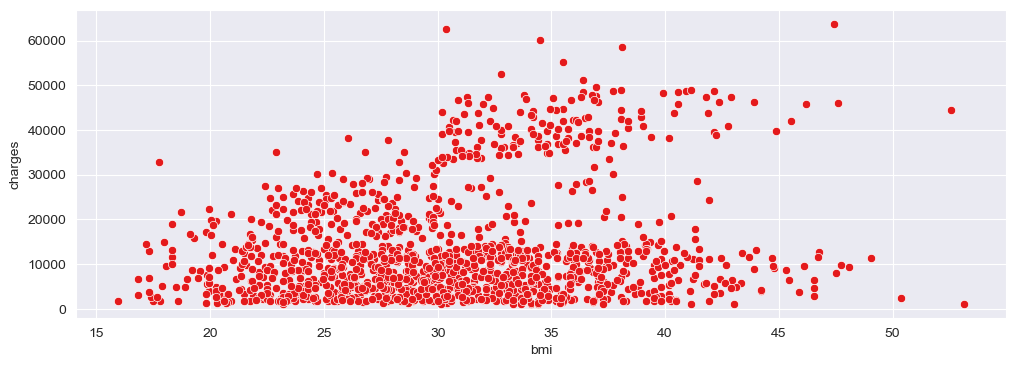

In [250]:
# Charges vs BMI
sns.scatterplot(data=data,x='bmi',y='charges')
fig=plt.gcf()
fig.set_size_inches(12,4)

### Insights
* Higher the bmi higher the cost of Insurance

<AxesSubplot:xlabel='children', ylabel='charges'>

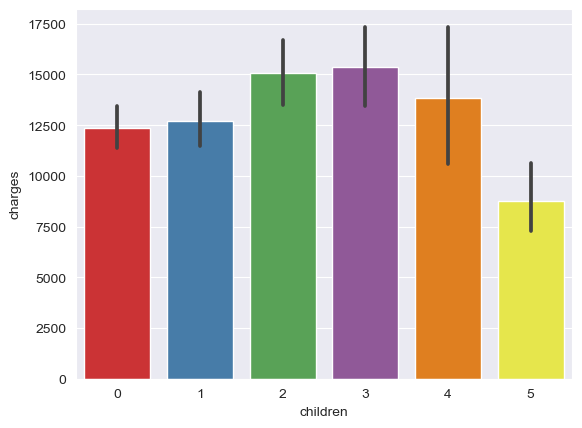

In [251]:
# children and charges
sns.barplot(data=data,x='children',y='charges')

### Insights
* People having 2 or 3 children pays higher Insurance cost

<AxesSubplot:xlabel='region', ylabel='charges'>

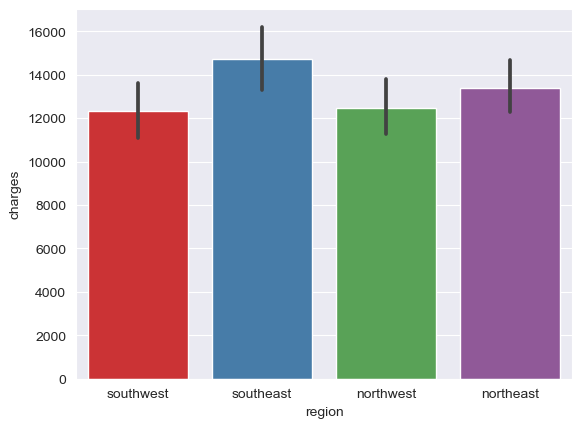

In [252]:
# region vs charges
sns.barplot(data=data,x='region',y='charges')

### Insights
* Southeast region has higher Insurance charges.

<AxesSubplot:xlabel='sex', ylabel='charges'>

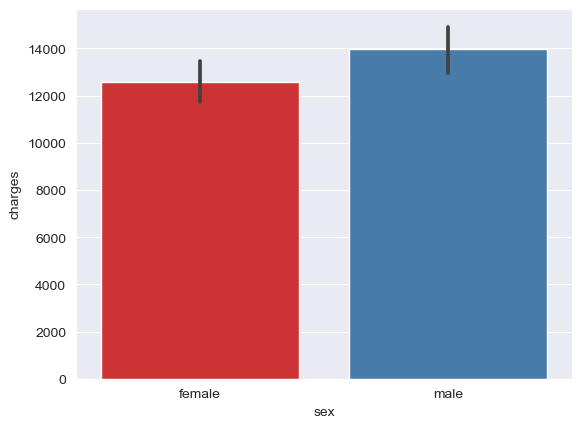

In [253]:
# sex vs charges
sns.barplot(data=data,x='sex',y='charges')

### Insights
* Males pay higher Insurance charges than Females.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

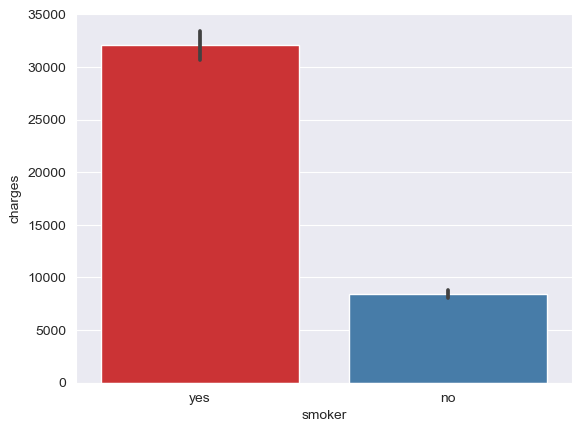

In [254]:
# smokers vs charges
sns.barplot(data=data,x='smoker',y='charges')

### Insights
* People who smoke are only 20.5% but they are charged higher Insurance charges.

<AxesSubplot:xlabel='smoker', ylabel='count'>

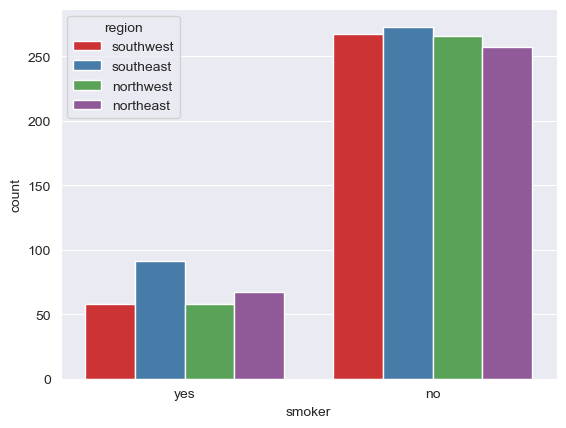

In [255]:
# Region vs smoker
sns.countplot(data=data,x='smoker',hue='region')

### Insights
* People who smoke are higher in southeast region followed by northeast.

## **Multivariate analysis**

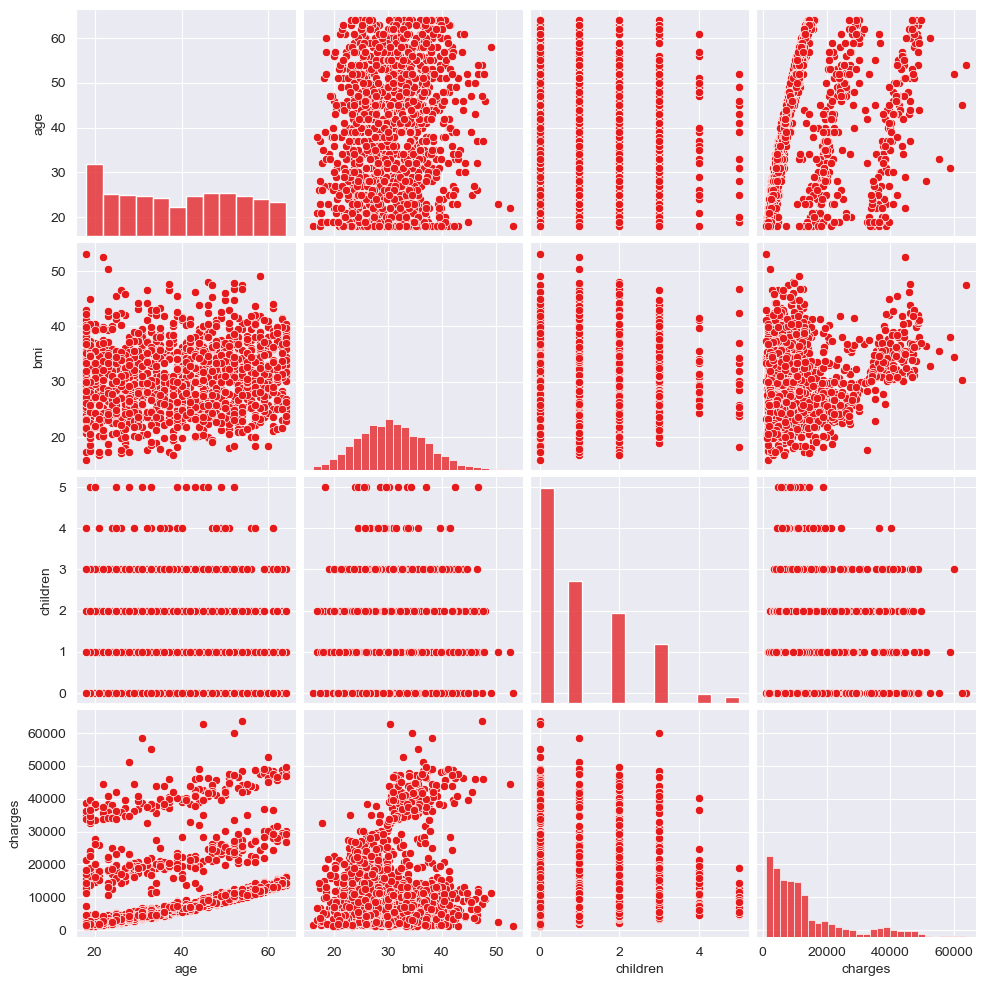

In [256]:
sns.pairplot(data)

## 3. **Feature Engineering and data preprocessing**

In [257]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values

<AxesSubplot:xlabel='age'>

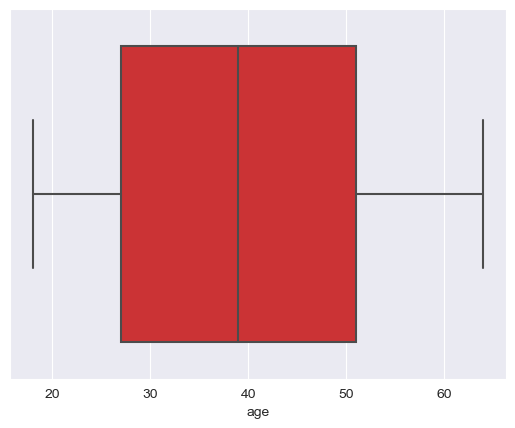

In [258]:
# checking for outliers in age
sns.boxplot(data=data,x='age')

<AxesSubplot:xlabel='bmi'>

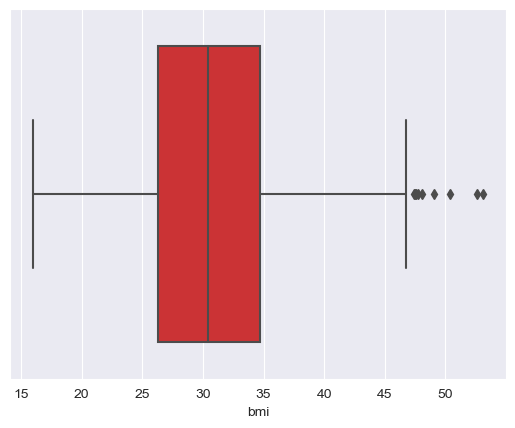

In [259]:
# checking for outliers in BMI
sns.boxplot(data=data,x='bmi')

<AxesSubplot:xlabel='charges'>

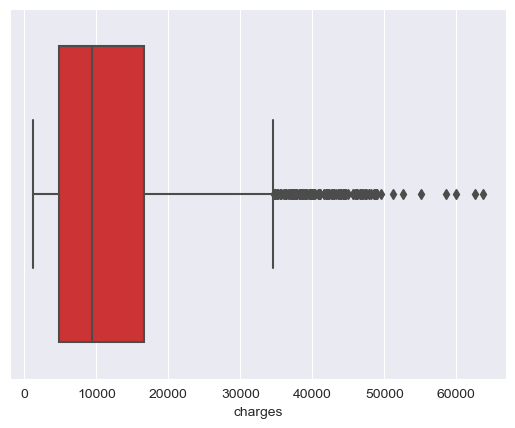

In [260]:
# checking for outliers in charges
sns.boxplot(data=data,x='charges')

#### Insights
1. We will handle the outliers in BMI column
2. Since charges is our target column the outliers here it is better to leave as it is.

In [261]:
# Since bmi coloumn is normally distributed we will use 3-sigma rule
# 3-sigma rule
low_limit=data['bmi'].mean()-3*data['bmi'].std()
upper_limit=data['bmi'].mean()+3*data['bmi'].std()
print("lower limit",low_limit)
print("upper limit",upper_limit)

lower limit 12.362046528819
upper limit 48.96485698651381


In [262]:
data.loc[data['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [263]:
data.loc[data['bmi']<low_limit]

,age,sex,bmi,children,smoker,region,charges


In [264]:
# Replacing outliers with nearest quantile values
data.loc[data['bmi']>upper_limit,'bmi']= data['bmi'].quantile(0.75)

In [265]:
# Rechecking outliers in bmi column
data.loc[data['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges


***The outliers in bmi column have been successfully handled***

### Categorical encoding

#### Converting categorical columns to numerical columns so that the model understands the data

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [267]:
# Converting object datatype to categorical
for cols in data.select_dtypes(include='object'):
    data[cols]=data[cols].astype('category')

In [268]:
# Fetching categorical columns
cat_cols = data[['sex','region','smoker']]

In [269]:
# Fetching unique values in categorical column
for cols in cat_cols:
    print('The unique values of',cols,cat_cols[cols].unique())

The unique values of sex ['female', 'male']
Categories (2, object): ['female', 'male']
The unique values of region ['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']
The unique values of smoker ['yes', 'no']
Categories (2, object): ['no', 'yes']


**Since all the columns represent nominal data we can use One-Hot Encoding**

In [270]:
data = pd.get_dummies(data,dtype=int, drop_first=True)

In [271]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Data Scaling

In [272]:
from sklearn.preprocessing import StandardScaler 

In [273]:
d = ['bmi','charges']

In [274]:
f = ['age']

In [275]:
scale = StandardScaler()

In [276]:
data[d] = scale.fit_transform(data[d])

In [277]:
print(data)

      age       bmi  children   charges  sex_male  smoker_yes  \
0      19 -0.452597         0  0.297857         0           1   
1      18  0.526369         1 -0.954381         1           0   
2      28  0.397953         3 -0.729373         1           0   
3      33 -1.318990         0  0.719104         1           0   
4      32 -0.289158         0 -0.777499         1           0   
...   ...       ...       ...       ...       ...         ...   
1333   50  0.059401         3 -0.221263         1           0   
1334   18  0.217836         0 -0.914695         0           0   
1335   18  1.040034         0 -0.962287         0           0   
1336   21 -0.802823         0 -0.931054         0           0   
1337   61 -0.257471         0  1.310298         0           1   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0              

In [278]:
data[f] = scale.fit_transform(data[f])

### Feature selection using corelation

In [279]:
data.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.117280,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.117280,1.000000,0.017023,0.200359,0.038991,0.002487,-0.133775,0.261122,-0.001627
children,0.041536,0.017023,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.200359,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.038991,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.002487,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.133775,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.261122,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.001627,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


<AxesSubplot:>

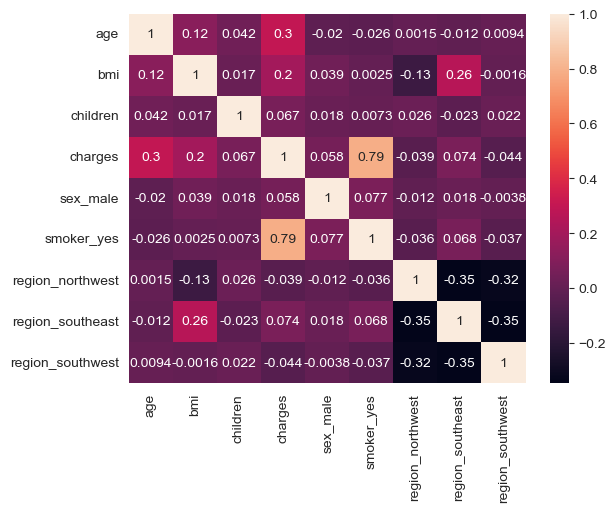

In [280]:
sns.heatmap(data.corr(),annot=True)

### Insigths
* Since there are only few columns it is better to include all the columns for model building

### Data Splitting

In [281]:
x = data.drop('charges',axis=1)
y = data['charges']

### Splitting data for training and testing

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=20)

In [284]:
x_train.shape

(935, 8)

In [285]:
x_test.shape

(402, 8)

## 4.**Data Modelling**

#### **Model 1 : Linear Regression**

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [162]:
y_pred_LR = model1.predict(x_test)

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score

In [164]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_pred_LR))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_pred_LR))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_pred_LR,squared=False))
print('r2_score :', r2_score(y_test,y_pred_LR))

Mean absolute Error, MAE : 0.3500892651286596
Mean Squared Error, MSE : 0.22668998216335945
Root Mean Sqaured Error, RMSE : 0.47611971410912973
r2_score : 0.7711871987707618


In [165]:
slope=model1.coef_
slope

array([ 0.29456801,  0.18171699,  0.04411755, -0.01601684,  1.95561884,
       -0.0607725 , -0.09153757, -0.09683574])

In [166]:
coeffecients = pd.DataFrame(slope,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,0.294568
bmi,0.181717
children,0.044118
sex_male,-0.016017
smoker_yes,1.955619
region_northwest,-0.060772
region_southeast,-0.091538
region_southwest,-0.096836


### **Model 2: KNN Regressor**

In [167]:
from sklearn.neighbors import KNeighborsRegressor

In [196]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [197]:
y_pred_KNN = knn_reg.predict(x_test)

In [198]:
mse = mean_squared_error(y_test, y_pred_KNN)

In [199]:
mse

0.2699813187437634

In [200]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_pred_KNN))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_pred_KNN))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_pred_KNN,squared=False))
print('r2_score :', r2_score(y_test,y_pred_KNN))

Mean absolute Error, MAE : 0.3220781630126161
Mean Squared Error, MSE : 0.2699813187437634
Root Mean Sqaured Error, RMSE : 0.5195972659125175
r2_score : 0.7274904641493715


In [173]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Create a KNN regressor
knn_reg = KNeighborsRegressor()

# Define a range of values for n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Initialize GridSearchCV with the KNN regressor and parameter grid
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(x, y)

# Get the best n_neighbors value from the search
best_n_neighbors = grid_search.best_params_['n_neighbors']

print(f"Best n_neighbors: {best_n_neighbors}")

Best n_neighbors: 3


### Model 3: DECISION TREE REGRESSOR(Default)

In [174]:
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,KFold, StratifiedKFold
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [175]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [176]:
y_pred_dtm = dtm.predict(x_test)

In [177]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_pred_dtm))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_pred_dtm))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_pred_dtm,squared=False))
print('r2_score :', r2_score(y_test,y_pred_dtm))

Mean absolute Error, MAE : 0.2193616012240476
Mean Squared Error, MSE : 0.12417245429898267
Root Mean Sqaured Error, RMSE : 0.3523811208038573
r2_score : 0.8746647433092782


### Hyperparameter tuning to get improved results

In [79]:
params_grid = {
    'max_depth': [None,2,4,6,8,10,12,14,16,18],
    'min_samples_split': [2,4,5,7,8,9,10,12,13,15],
    'min_samples_leaf': [1,2,4,5,7,8,9,10,11,13],
    'max_leaf_nodes':[8,10,11,12,13,14,15,16,17,18]
}

In [ ]:
dtm = DecisionTreeRegressor()
grid_search = GridSearchCV(dtm, params_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [178]:
dtm1 = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10,
                           min_samples_leaf =13)

In [179]:
dtm1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_leaf=13,
                      min_samples_split=5)

In [180]:
y_pred1_dtm1 = dtm1.predict(x_test)

In [181]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_pred1_dtm1))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_pred1_dtm1))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_pred1_dtm1,squared=False))
print('r2_score :', r2_score(y_test,y_pred1_dtm1))

Mean absolute Error, MAE : 0.21936160122404755
Mean Squared Error, MSE : 0.12417245429898266
Root Mean Sqaured Error, RMSE : 0.3523811208038573
r2_score : 0.8746647433092782


### **Model 4: SVM Regressor**

In [182]:
from sklearn.svm import SVR

In [183]:
svr_reg = SVR(kernel='linear', C=1.0, epsilon=0.1)

In [184]:
# Fit the SVR model to the training data
svr_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred_svr = svr_reg.predict(x_test)

In [185]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_pred_svr))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_pred_svr))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_pred_svr,squared=False))
print('r2_score :', r2_score(y_test,y_pred_svr))

Mean absolute Error, MAE : 0.2753282962794054
Mean Squared Error, MSE : 0.2698192822339948
Root Mean Sqaured Error, RMSE : 0.5194413174113076
r2_score : 0.7276540180362603


### **Model 5: RANDOM FOREST Regressor**

In [186]:
forest=RandomForestRegressor(n_estimators=100,criterion='squared_error',random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [187]:
y_pred_RF=forest.predict(x_test)

In [188]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_pred_RF))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_pred_RF))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_pred_RF,squared=False))
print('r2_score :', r2_score(y_test,y_pred_RF))

Mean absolute Error, MAE : 0.21685088353920606
Mean Squared Error, MSE : 0.13391923969077135
Root Mean Sqaured Error, RMSE : 0.36594977755256436
r2_score : 0.8648266849743129


### **Model 6: GradientBoost Regressor**

In [189]:
from sklearn.ensemble import GradientBoostingRegressor

In [190]:
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Fit the model to the training data
gb_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred_Gb = gb_reg.predict(x_test)

In [191]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_pred_Gb))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_pred_Gb))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_pred_Gb,squared=False))
print('r2_score :', r2_score(y_test,y_pred_Gb))

Mean absolute Error, MAE : 0.19955331103387786
Mean Squared Error, MSE : 0.1185205637946938
Root Mean Sqaured Error, RMSE : 0.3442681568119448
r2_score : 0.880369560461698


### **Model 7: XGBoost Regressor**

In [192]:
import xgboost as xgb

In [193]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Fit the model to the training data
xgb_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_reg.predict(x_test)

In [194]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_pred_xgb))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_pred_xgb))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_pred_xgb,squared=False))
print('r2_score :', r2_score(y_test,y_pred_xgb))

Mean absolute Error, MAE : 0.19882817556073074
Mean Squared Error, MSE : 0.11710080317457973
Root Mean Sqaured Error, RMSE : 0.34219994619312805
r2_score : 0.881802616309438


## Comparison of models

##### Comparison of r2_scores

In [201]:
# Comparing R2 scores
Rsquared={'Linear_Regression':round(model1.score(x_test,y_test),2)*100 ,'KNN_Reg': round(knn_reg.score(x_test,y_test),3)*100, 'DecisionTreeRegressor': round(dtm1.score(x_test,y_test),3)*100 , 'SVM_Reg': round(svr_reg.score(x_test,y_test),3)*100 , 'RandomForestRegressor': round(forest.score(x_test,y_test),3)*100 , 'GradientBoostingRegressor': round(gb_reg.score(x_test,y_test),3)*100 , 'XGBoostRegressor': round(xgb_reg.score(x_test,y_test),3)*100   } 

In [202]:
Rsquared 

{'Linear_Regression': 77.0,
 'KNN_Reg': 72.7,
 'DecisionTreeRegressor': 87.5,
 'SVM_Reg': 72.8,
 'RandomForestRegressor': 86.5,
 'GradientBoostingRegressor': 88.0,
 'XGBoostRegressor': 88.2}

In [203]:
name=list(Rsquared.keys())
values=list(Rsquared.values())

#### COMPARISION OF RSQUARED IN TERMS OF VISUALS

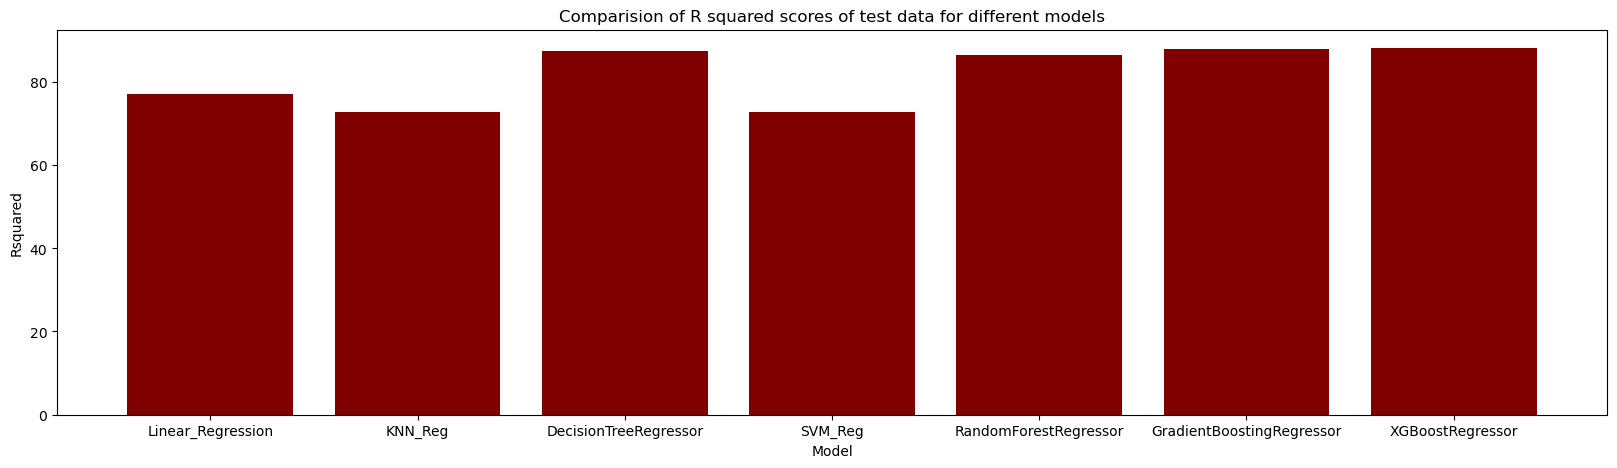

In [204]:
plt.figure(figsize=(20,5))
plt.bar(name,values,color='maroon')
plt.title("Comparision of R squared scores of test data for different models")
plt.xlabel("Model")
plt.ylabel("Rsquared")
plt.show()

<AxesSubplot:title={'center':'XGBoost Regressor'}, xlabel='y_test', ylabel='y_pred_xgb'>

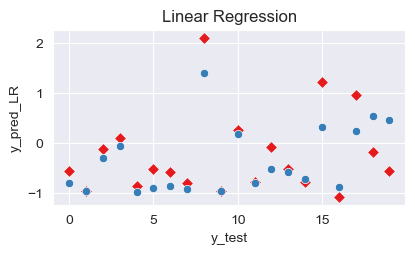

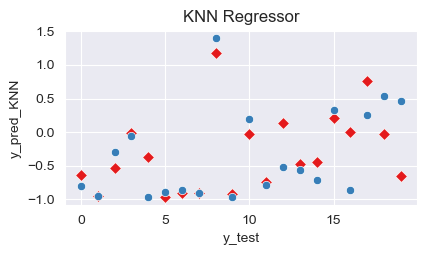

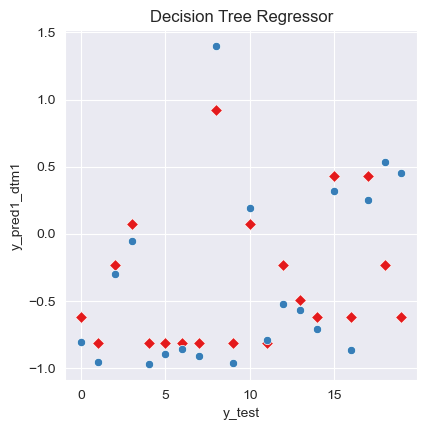

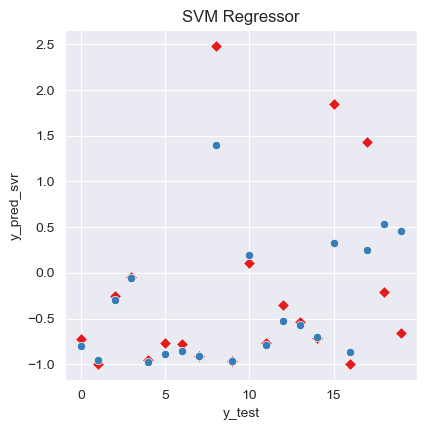

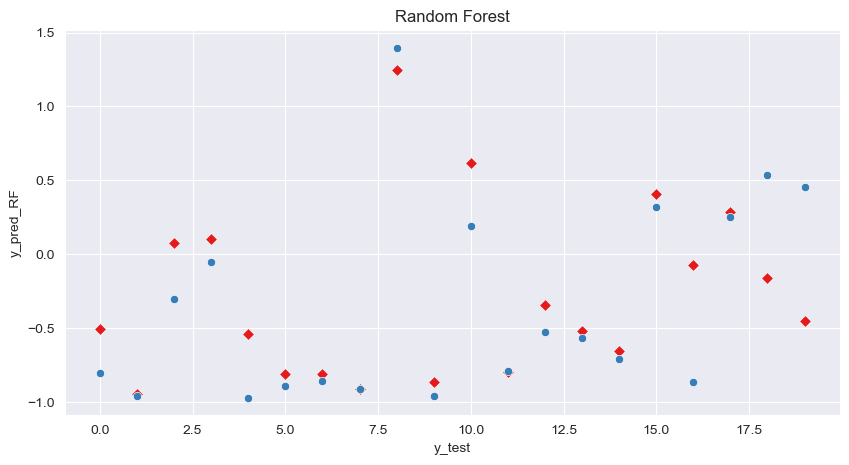

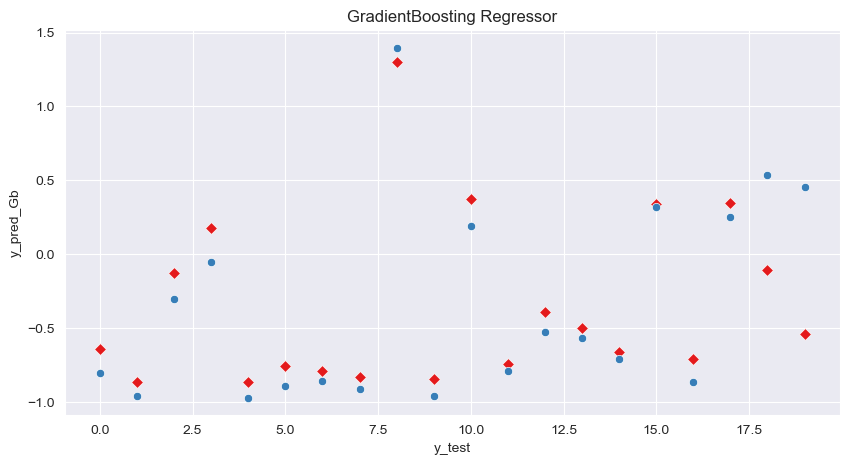

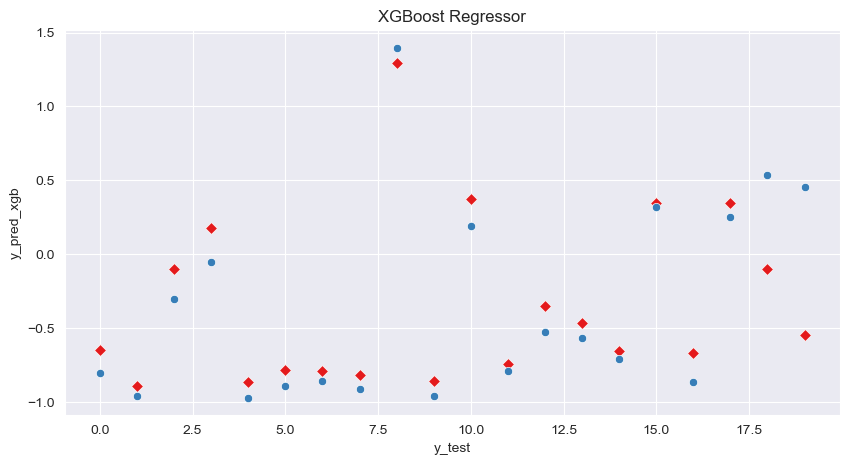

In [205]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

sns.set_palette('Set1')
plt.subplot(221)
plt.title('Linear Regression')
plt.xlabel('y_test')
plt.ylabel('y_pred_LR')
index1=range(0,len(y_test[0:20]))


sns.scatterplot(x=index1,y=y_pred_LR[0:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

sns.set_palette('Set1')
plt.subplot(222)
plt.title('KNN Regressor')
plt.xlabel('y_test')
plt.ylabel('y_pred_KNN')
index1=range(0,len(y_test[0:20]))


sns.scatterplot(x=index1,y=y_pred_KNN[0:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')

sns.set_palette('Set1')
plt.subplot(223)
plt.title('Decision Tree Regressor')
plt.xlabel('y_test')
plt.ylabel('y_pred1_dtm1')
index1=range(0,len(y_test[0:20]))


sns.scatterplot(x=index1,y=y_pred1_dtm1[0:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')

sns.set_palette('Set1')
plt.subplot(224)
plt.title('SVM Regressor')
plt.xlabel('y_test')
plt.ylabel('y_pred_svr')
index1=range(0,len(y_test[0:20]))


sns.scatterplot(x=index1,y=y_pred_svr[0:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])


plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

sns.set_palette('Set1')
#plt.subplot(225)
plt.title('Random Forest')
plt.xlabel('y_test')
plt.ylabel('y_pred_RF')
index1=range(0,len(y_test[0:20]))


sns.scatterplot(x=index1,y=y_pred_RF[0:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])


plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

sns.set_palette('Set1')
#plt.subplot(226)
plt.title('GradientBoosting Regressor')
plt.xlabel('y_test')
plt.ylabel('y_pred_Gb')
index1=range(0,len(y_test[0:20]))


sns.scatterplot(x=index1,y=y_pred_Gb[0:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])


plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

sns.set_palette('Set1')
#plt.subplot(227)
plt.title('XGBoost Regressor')
plt.xlabel('y_test')
plt.ylabel('y_pred_xgb')
index1=range(0,len(y_test[0:20]))


sns.scatterplot(x=index1,y=y_pred_xgb[0:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])



In [206]:
Rsquared

{'Linear_Regression': 77.0,
 'KNN_Reg': 72.7,
 'DecisionTreeRegressor': 87.5,
 'SVM_Reg': 72.8,
 'RandomForestRegressor': 86.5,
 'GradientBoostingRegressor': 88.0,
 'XGBoostRegressor': 88.2}

## Conclusion

**XGBoost Regressor model is giving maximum R2 score hence XGBoost is the perfect model which can give better accuracy for making Insurance cost predictions.**

In [207]:
import pickle

In [208]:
file = open('XGBoost_regression_model.pkl','wb')
pickle.dump(xgb_reg,file)